- https://scikit-learn.org/stable/modules/tree.html
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [1]:
import sklearn

sklearn.__version__

'0.22.2'

In [2]:
!pip3 install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/site-packages (0.22.2)


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 14

In [3]:
x = np.linspace(0, 2* np.pi, 100)
y = np.sin(x) + .5*np.random.random(100)

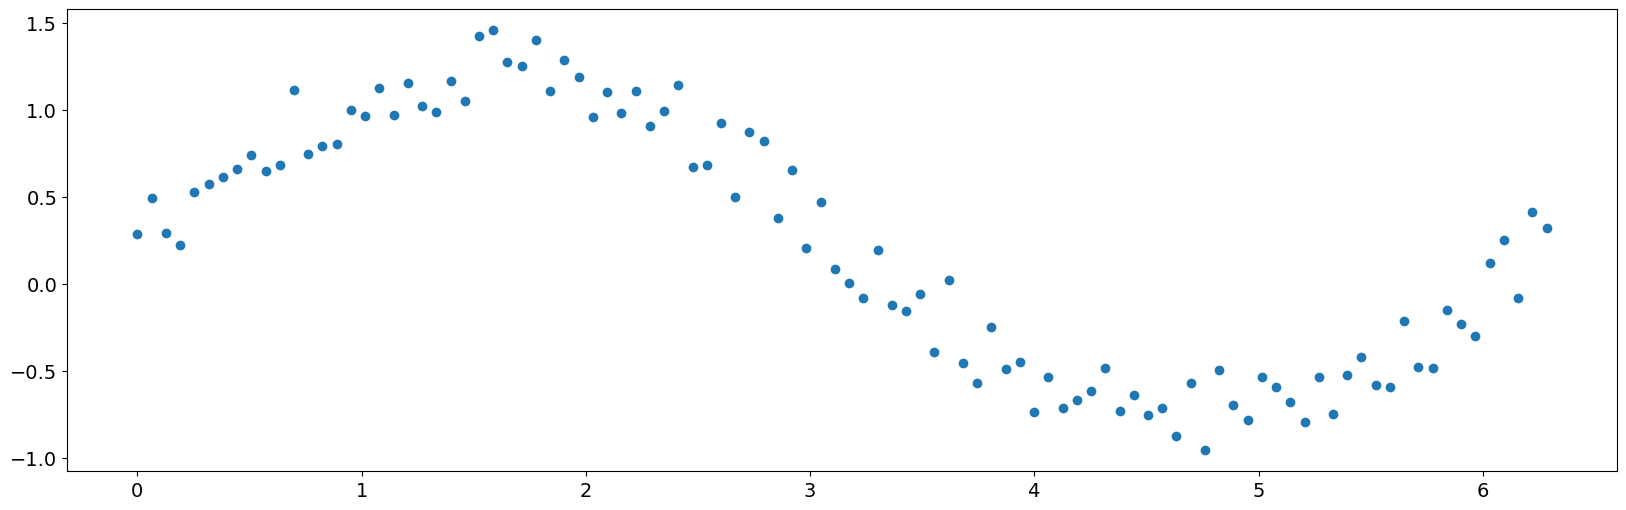

In [4]:
plt.scatter(x, y)

In [5]:
from sklearn import tree

In [6]:
2**16

65536

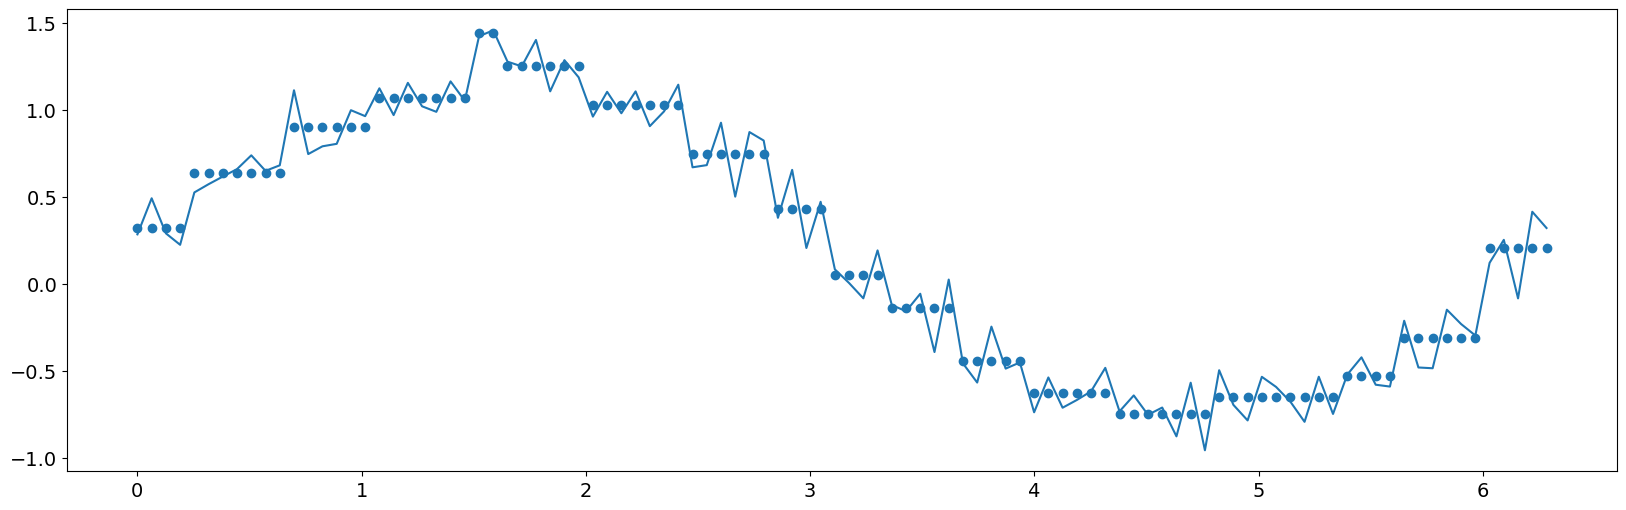

In [13]:
regression = tree.DecisionTreeRegressor(max_depth=8, min_samples_split=8)
regression.fit(x.reshape(-1, 1), y)

yp = regression.predict(x.reshape(-1,1))

plt.scatter(x, yp)
plt.plot(x, y)

In [14]:
regression.predict([[2]])

array([1.02875741])

In [15]:
path = regression.decision_path(x.reshape(-1, 1))

In [16]:
path.todense()

matrix([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 1]])

[Text(0.5394736842105263, 0.9444444444444444, 'x[0] <= 3.078\nsquared_error = 0.506\nsamples = 100\nvalue = 0.22'),
 Text(0.23684210526315788, 0.8333333333333334, 'x[0] <= 0.666\nsquared_error = 0.101\nsamples = 49\nvalue = 0.866'),
 Text(0.10526315789473684, 0.7222222222222222, 'x[0] <= 0.222\nsquared_error = 0.029\nsamples = 11\nvalue = 0.523'),
 Text(0.05263157894736842, 0.6111111111111112, 'squared_error = 0.01\nsamples = 4\nvalue = 0.324'),
 Text(0.15789473684210525, 0.6111111111111112, 'squared_error = 0.004\nsamples = 7\nvalue = 0.636'),
 Text(0.3684210526315789, 0.7222222222222222, 'x[0] <= 2.443\nsquared_error = 0.078\nsamples = 38\nvalue = 0.966'),
 Text(0.2631578947368421, 0.6111111111111112, 'x[0] <= 1.047\nsquared_error = 0.031\nsamples = 28\nvalue = 1.089'),
 Text(0.21052631578947367, 0.5, 'squared_error = 0.017\nsamples = 6\nvalue = 0.904'),
 Text(0.3157894736842105, 0.5, 'x[0] <= 1.999\nsquared_error = 0.023\nsamples = 22\nvalue = 1.14'),
 Text(0.2631578947368421, 0.388

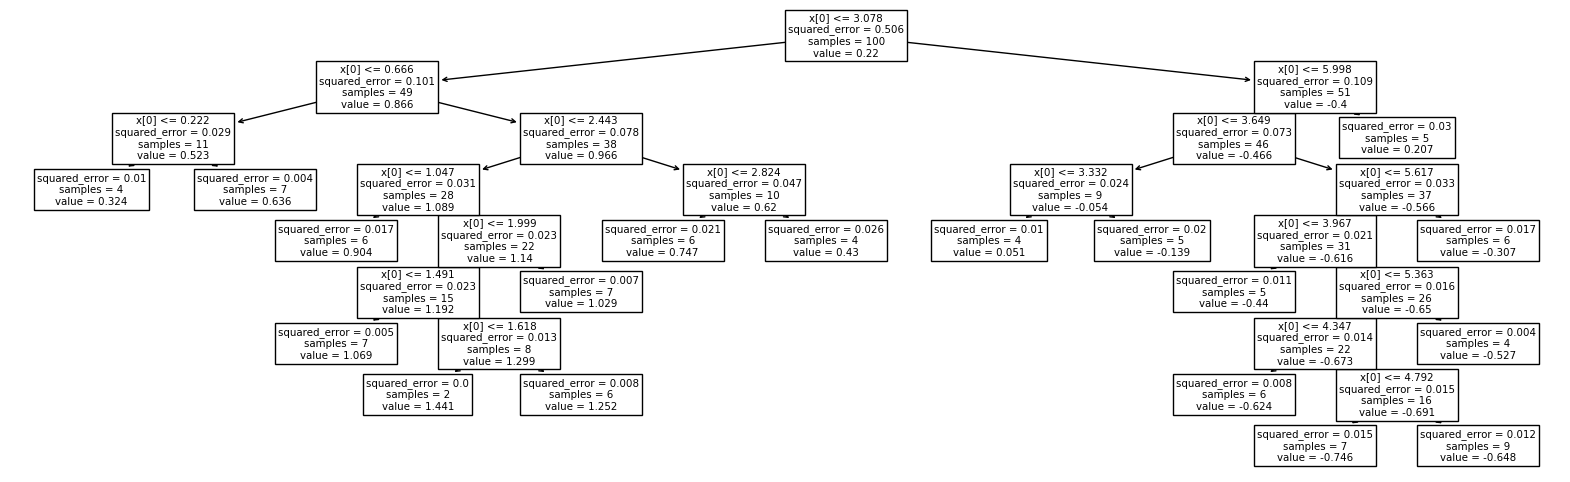

In [17]:
tree.plot_tree(regression)

In [18]:
bikeshare = pd.read_csv('bikeshare_daily_agg.csv', index_col='hour_of_day')

In [19]:
bikeshare

,0,1,2,3,4,5,6
hour_of_day,,,,,,,
0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...
23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0


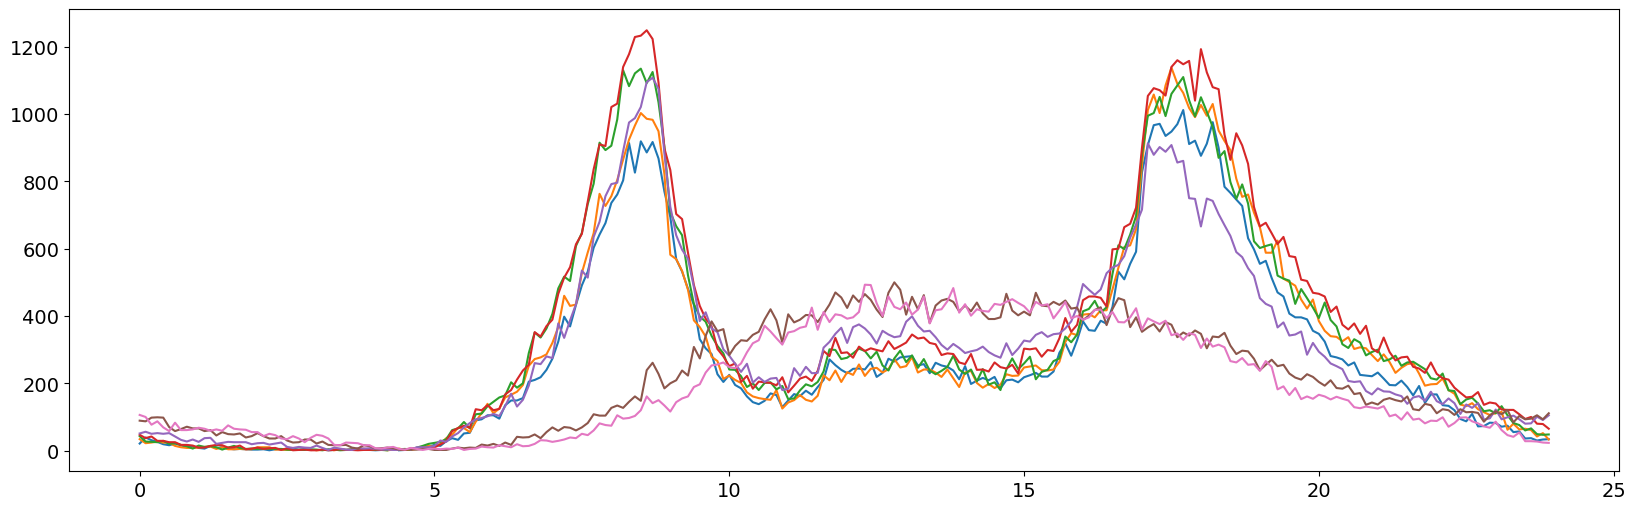

In [20]:
plt.plot(bikeshare)

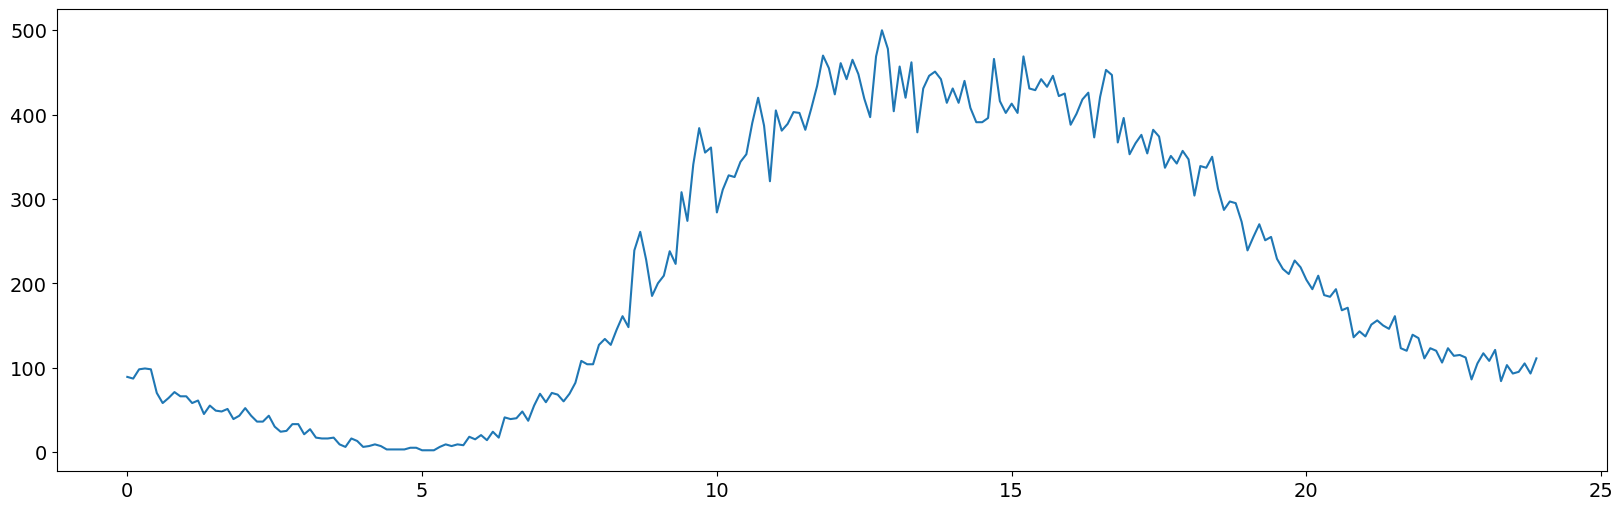

In [21]:
plt.plot(bikeshare['5'])

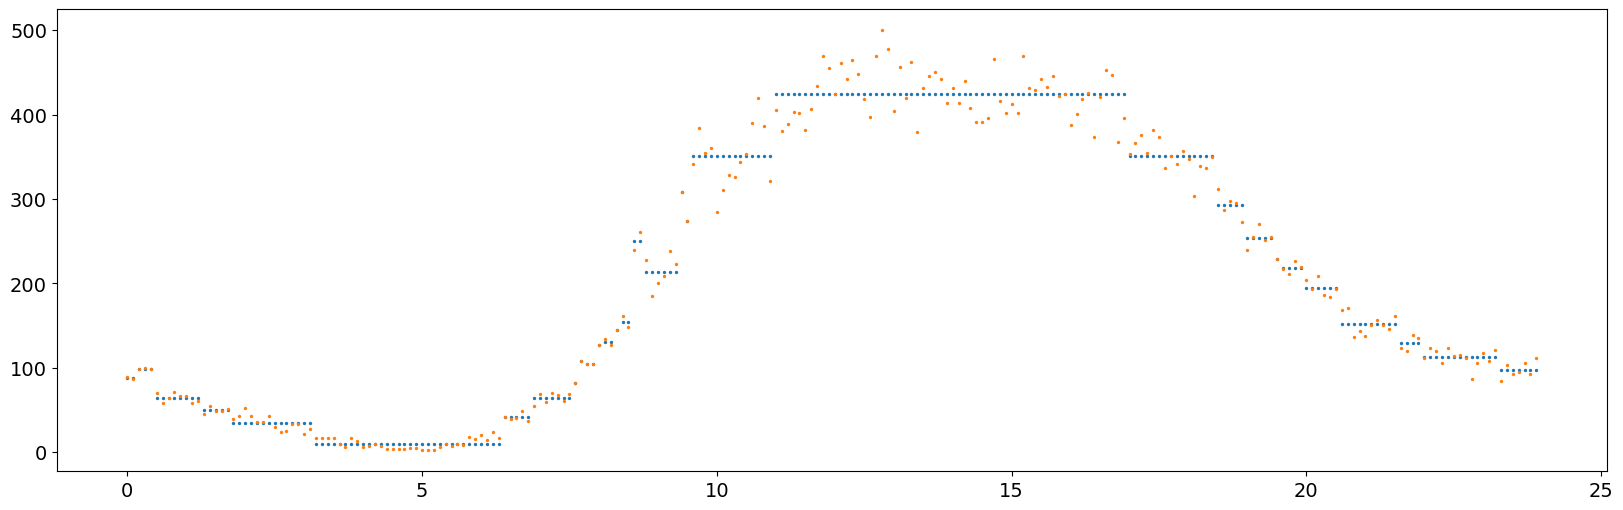

In [22]:
hours = bikeshare.index.values.reshape(-1,1)

bike_reg = tree.DecisionTreeRegressor(max_depth=5)
bike_reg.fit(hours, bikeshare['5'].fillna(0))

bike_pred = bike_reg.predict(hours)

plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, bikeshare['5'], s=2)

# Use the bikeshare dataset (see above) and choose a weekday (0,1,2,3,4).

# 1. Create 5 Decision Tree Regressors using `max_depth=4,5,6,7,8`. For each one of these models, calculate the MSE between the predicted values from the model (`bike_pred`) and the actual values (`bikeshare['n']`). Create a plot showing the predictions along with the actuals. You may also show the `print_tree()` for a sanity check as well.

# 2. Using the 5 models created with various `max_depth` values, calculate the MSE between the predicted values (`bike_pred`) and values from all of the weekdays [`0,1,2,3,4`]. You should have 25 total MSE values, 5 values for each `max_depth`. 

# 3. (2 cont'd) Describe which max_depth you would recommend based on the groups of MSE values. Use the idea of generality of the model for your argument along with the MSE values as proof.

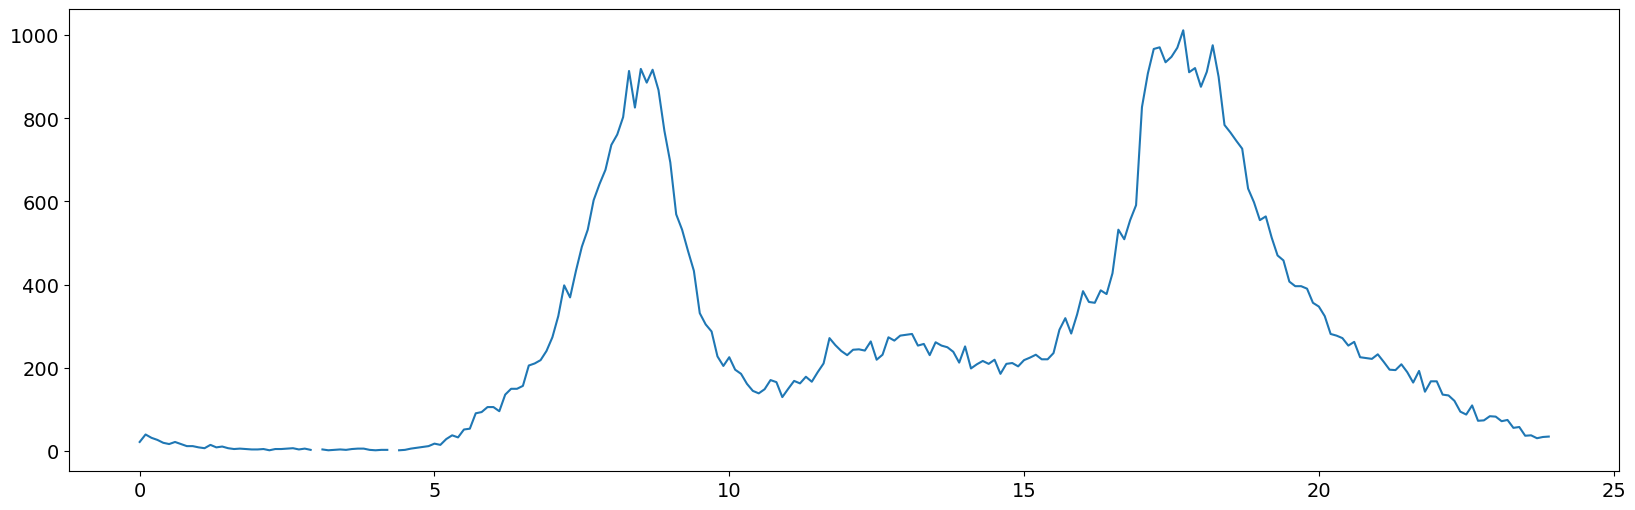

In [23]:
plt.plot(bikeshare['0'])

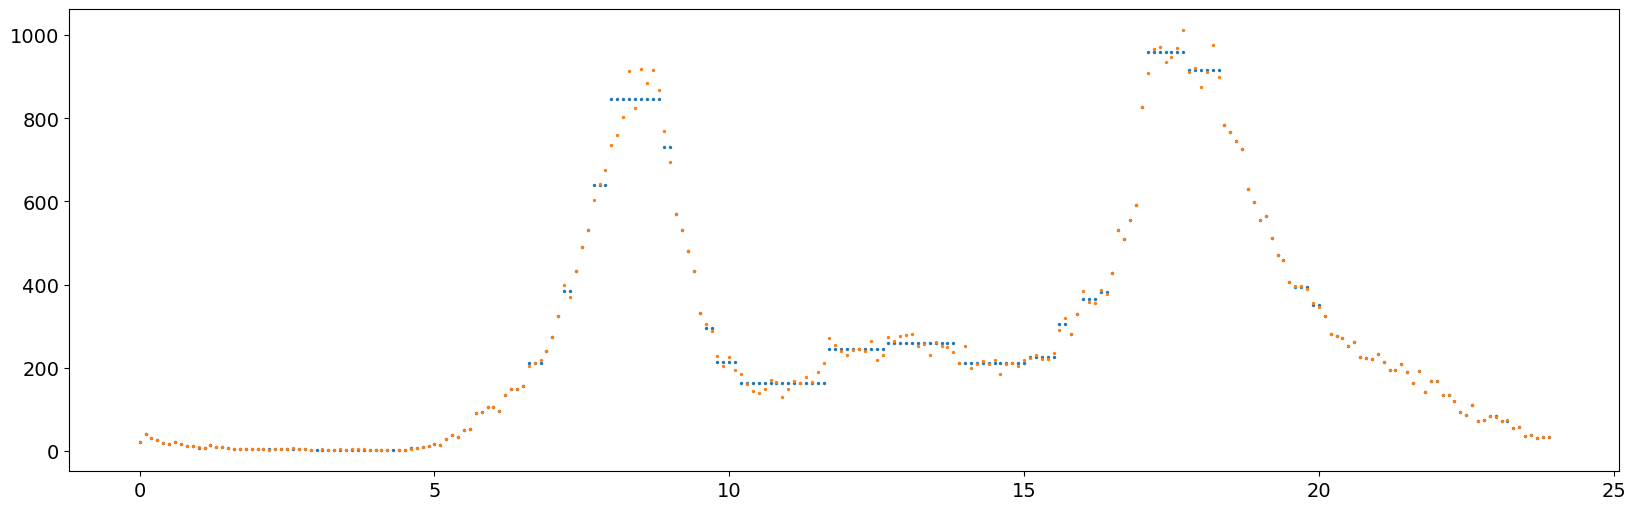

In [25]:
hours = bikeshare.index.values.reshape(-1,1)

bike_reg = tree.DecisionTreeRegressor(max_depth=8)
bike_reg.fit(hours, bikeshare['0'].fillna(0))

bike_pred = bike_reg.predict(hours)

plt.scatter(hours, bike_pred, s=2)
plt.scatter(hours, bikeshare['0'], s=2)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
mean_squared_error(bike_pred, bikeshare['0'].fillna(0))

303.154213022816

In [29]:
mean_absolute_error(bike_pred, bikeshare['0'].fillna(0))

7.816782691709163